In [1]:
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import routingpy
from routingpy import OSRM
import numpy as np
import contextily as ct

In [4]:
df=pd.read_excel('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/gnv/Microtransit/Microtransit O-D Data_08152022_01012023.xlsx')

In [5]:
df

origin_address  origin_latitude  \
0         CR-225, Gainesville, FL, 32641, United States        29.643272   
1             700 SE 3rd St, Gainesville, FL 32601, USA        29.646002   
2                 3190 SE 20th Ave Gainesville, FL, USA        29.633682   
3          1370 SE 23rd Ave, Gainesville, FL 32641, USA        29.631192   
4                   4628 SE 1st Pl Gainesville, FL, USA        29.650598   
...                                                 ...              ...   
4670  PASSAGE Christian Academy & Prime Time After S...        29.650836   
4671  PASSAGE Christian Academy & Prime Time After S...        29.650836   
4672  PASSAGE Christian Academy & Prime Time After S...        29.650836   
4673  PASSAGE Christian Academy & Prime Time After S...        29.650836   
4674  PASSAGE Christian Academy & Prime Time After S...        29.650836   

      origin_longitude               origin_timestamp  \
0           -82.272090  2022-09-07 07:11:47.000 UTC-4   
1           -82.322709  2022-12-07 17:20:39.000 UTC-5   
2           -82.284142  2022-11-08 17:00:47.000 UTC-5   
3           -82.307731  2022-10-06 08:13:38.000 UTC-4   
4           -82.268535  2022-08-17 08:10:10.000 UTC-4   
...                ...                            ...   
4670        -82.263676  2022-11-15 16:30:00.000 UTC-5   
4671        -82.263676  2022-10-20 08:00:00.000 UTC-4   
4672        -82.263676  2022-12-13 16:45:00.000 UTC-5   
4673        -82.263676  2022-11-28 16:45:00.000 UTC-5   
4674        -82.263676  2022-10-05 16:30:00.000 UTC-4   

                                    destination_address  destination_latitude  \
0           4401 SE 4th Ave, Gainesville, FL 32641, USA             29.647158   
1            4820 NE 3rd Pl, Gainesville, FL 32641, USA             29.654473   
2                                   Walmart Supercenter             29.662877   
3           1201 SE 43rd St, Gainesville, FL 32641, USA             29.640162   
4     Eastside High School Southeast 43rd Street, Ga...             29.640162   
...                                                 ...                   ...   
4670                   Caring & Sharing Learning School             29.633702   
4671                        Rosa Parks Transfer Station             29.646002   
4672                        Rosa Parks Transfer Station             29.646002   
4673                        Rosa Parks Transfer Station             29.646002   
4674                   Caring & Sharing Learning School             29.633702   

      destination_longitude  wheelchair                   completed_at  
0                -82.270890       False  2022-09-07 07:24:32.000 UTC-4  
1                -82.266329       False  2022-12-07 18:14:40.000 UTC-5  
2                -82.302392       False  2022-11-08 17:46:54.000 UTC-5  
3                -82.268649       False  2022-10-06 08:27:53.000 UTC-4  
4                -82.268649       False  2022-08-17 08:16:38.000 UTC-4  
...                     ...         ...                            ...  
4670             -82.315374       False  2022-11-15 17:34:18.000 UTC-5  
4671             -82.322709       False  2022-10-20 08:33:49.000 UTC-4  
4672             -82.322709       False  2022-12-13 17:00:25.000 UTC-5  
4673             -82.322709       False  2022-11-28 16:49:40.000 UTC-5  
4674             -82.315374       False  2022-10-05 17:08:38.000 UTC-4  

[4675 rows x 9 columns]

In [6]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df['origin_longitude'],df['origin_latitude'])]
mcirotransit1=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

geometry=[Point(xy) for xy in zip(df['destination_longitude'],df['destination_latitude'])]
mcirotransit2=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
mcirotransit11=mcirotransit1[['origin_latitude','origin_longitude']].rename(columns={'origin_latitude':'lat','origin_longitude':'lon'})
mcirotransit22=mcirotransit2[['destination_latitude','destination_longitude']].rename(columns={'destination_latitude':'lat','destination_longitude':'lon'})

dfs=[mcirotransit11,mcirotransit22]

mcirotransit_df=pd.DataFrame()

mcirotransit_df[['lat','lon']]=gpd.pd.concat([df[['lat','lon']] for df in dfs])

In [10]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(mcirotransit_df['lon'],mcirotransit_df['lat'])]
mcirotransit_merge=gpd.GeoDataFrame(mcirotransit_df,crs=crs,geometry=geometry)

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
mcirotransit_merge.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/fmlm/microtransit/mcirotransit_merge.shp')

In [2]:
result=gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/fmlm/result5.shp') 
result=result.rename(columns={'Join_Count':'all_microtransit'})
#calculate the microtransit trip %
result['microtran']=result['inner_micr']/result['all_microtransit']

In [13]:
bus_num=gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/dbscan100_new.shp')
 #calculate the bus stop number
bus_num2=bus_num[bus_num['CLUSTER_ID']!=-1].groupby(['CLUSTER_ID']).size().reset_index()
bus_num2=bus_num2.rename(columns={0:'bus_stop_num'})

result2=pd.merge(result,bus_num2,how='left',on='CLUSTER_ID')
result2['bus_stop_num']=result2['bus_stop_num'].fillna(1)
result2=result2.rename(columns={'Shape_Leng':'sidewalk'})

In [31]:
result2=result2.rename(columns={'Shape_Leng':'sidewalk'})

In [68]:
result2=result2.fillna(0)

In [77]:
result2

all_microtransit  TARGET_FID  All_scoote  TARGET_F_1  inner_micr  \
0                   0           0        6448           1         0.0   
1                   0           1        5108           2         0.0   
2                   0           2        6651           3         0.0   
3                   0           3       10032           4         0.0   
4                   0           4       13151           5         0.0   
..                ...         ...         ...         ...         ...   
623                 0         623       46031         624         0.0   
624                 0         624           0         625         0.0   
625                 0         625         996         626         0.0   
626                 0         626           0         627         0.0   
627                 0         627         969         628         0.0   

     CLUSTER_ID  ORIG_FID  Route  total_trip  Total_Acti  ...    FMLM_score  \
0           1.0       1.0    8.0      1235.0      1829.0  ...  23730.083070   
1           2.0       2.0    8.0      1230.0       124.0  ...  27506.455494   
2           3.0       3.0    8.0      1230.0        42.0  ...  26620.230381   
3           4.0       4.0    4.0       338.0        51.0  ...  26736.284234   
4           5.0       5.0    2.0       300.0        77.0  ...  12171.882791   
..          ...       ...    ...         ...         ...  ...           ...   
623        -1.0     220.0    1.0        44.0        15.0  ...  93855.342879   
624        -1.0     221.0    1.0        68.0         6.0  ...  94641.914873   
625        -1.0     222.0    2.0        30.0         3.0  ...  98263.558637   
626        -1.0     223.0    1.0        18.0        25.0  ...  21426.585424   
627        -1.0     224.0    2.0        30.0         4.0  ...  20608.197276   

     lat  lon  Shape_Le_1  Shape_Area  lat_1  lon_1  microtran  \
0    0.0  0.0    0.099152    0.000775    0.0    0.0        0.0   
1    0.0  0.0    0.099078    0.000774    0.0    0.0        0.0   
2    0.0  0.0    0.097762    0.000755    0.0    0.0        0.0   
3    0.0  0.0    0.098380    0.000764    0.0    0.0        0.0   
4    0.0  0.0    0.098995    0.000773    0.0    0.0        0.0   
..   ...  ...         ...         ...    ...    ...        ...   
623  0.0  0.0    0.097347    0.000749    0.0    0.0        0.0   
624  0.0  0.0    0.097330    0.000748    0.0    0.0        0.0   
625  0.0  0.0    0.097347    0.000749    0.0    0.0        0.0   
626  0.0  0.0    0.097341    0.000749    0.0    0.0        0.0   
627  0.0  0.0    0.097347    0.000749    0.0    0.0        0.0   

                                              geometry  bus_stop_num  
0    POLYGON ((-82.38642 29.61052, -82.38759 29.610...           2.0  
1    POLYGON ((-82.38514 29.60859, -82.38630 29.608...           2.0  
2    POLYGON ((-82.38287 29.60857, -82.38404 29.608...           2.0  
3    POLYGON ((-82.38073 29.60944, -82.38189 29.609...           2.0  
4    POLYGON ((-82.37550 29.60936, -82.37667 29.609...           2.0  
..                                                 ...           ...  
623  POLYGON ((-82.36155 29.65501, -82.36038 29.654...           1.0  
624  POLYGON ((-82.43880 29.62163, -82.43763 29.621...           1.0  
625  POLYGON ((-82.40534 29.65450, -82.40417 29.654...           1.0  
626  POLYGON ((-82.43640 29.64282, -82.43523 29.642...           1.0  
627  POLYGON ((-82.40642 29.65427, -82.40526 29.654...           1.0  

[628 rows x 48 columns]

In [69]:
df=result2[[
       'inner_micr', 'Route', 'total_trip',
       'Total_Acti', 'W_C_TOTAL', 'BIKE_TOTAL', 'inner_scoo', 'scooter_tr', 'HISPNC_N_1', 'VEHICLE_0_', 'BACHELORS_', 'AGE_UNDE_1',
       'AGE_65_UP_', 'DIS_2064_', 'S_NOTATA_1', 'BELOW_POV_', 'bike',
       'bike_osm', 'sidewalk', 'sidewalk_o', 'FMLM_score', 'microtran', 'bus_stop_num']]

In [70]:
#normalize the selected columns and save to a new df
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result

In [71]:
df_norm=normalize(df)

In [72]:
df_norm.describe()

inner_micr       Route  total_trip  Total_Acti   W_C_TOTAL  BIKE_TOTAL  \
count  628.000000  628.000000  628.000000  628.000000  628.000000  628.000000   
mean    10.861238    8.821656    7.361045    1.359921    0.852104    1.847645   
std     22.536603   12.462641   13.437629    6.011150    4.837794    5.949645   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    4.000000    1.229600    0.072233    0.000000    0.000000   
50%      0.000000    4.000000    2.794545    0.202254    0.115607    0.297442   
75%      2.610607   12.000000    5.790297    0.740393    0.531792    1.487210   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

       inner_scoo  scooter_tr  HISPNC_N_1  VEHICLE_0_  ...   DIS_2064_  \
count  628.000000  628.000000  628.000000  628.000000  ...  628.000000   
mean     1.761378    0.811910   43.328716   42.377803  ...   33.792763   
std      7.963221    4.617473   28.270450   20.711738  ...   25.026380   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000   18.337395   27.295727  ...   13.236564   
50%      0.063032    0.051531   39.121354   45.422605  ...   24.281110   
75%      0.441223    0.336816   71.687476   55.885472  ...   56.601029   
max    100.000000  100.000000  100.000000  100.000000  ...  100.000000   

       S_NOTATA_1  BELOW_POV_        bike    bike_osm    sidewalk  sidewalk_o  \
count  628.000000  628.000000  628.000000  628.000000  628.000000  628.000000   
mean    14.583285   50.171362   45.847821   42.063937   33.461076   51.591882   
std     15.433837   22.852312   23.865122   15.939130   24.071107   24.828935   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.938073   34.488658   29.008751   30.528378   18.565344   35.557588   
50%     12.129738   54.166311   42.864086   42.345867   26.633730   44.846713   
75%     17.622648   64.585729   63.173072   55.056140   42.368044   73.915240   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

       FMLM_score   microtran  bus_stop_num  
count  628.000000  628.000000    628.000000  
mean    24.417133   22.347277     10.304823  
std     26.493392   38.499384     10.016327  
min      0.000000    0.000000      0.000000  
25%      4.927543    0.000000      0.000000  
50%     14.217888    0.000000     14.285714  
75%     33.684966   35.067100     14.285714  
max    100.000000  100.000000    100.000000  

[8 rows x 23 columns]

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_1048\1738189301.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_norm.hist(ax=axis)


array([[<AxesSubplot: title={'center': 'inner_micr'}>,
        <AxesSubplot: title={'center': 'Route'}>,
        <AxesSubplot: title={'center': 'total_trip'}>,
        <AxesSubplot: title={'center': 'Total_Acti'}>,
        <AxesSubplot: title={'center': 'W_C_TOTAL'}>],
       [<AxesSubplot: title={'center': 'BIKE_TOTAL'}>,
        <AxesSubplot: title={'center': 'inner_scoo'}>,
        <AxesSubplot: title={'center': 'scooter_tr'}>,
        <AxesSubplot: title={'center': 'HISPNC_N_1'}>,
        <AxesSubplot: title={'center': 'VEHICLE_0_'}>],
       [<AxesSubplot: title={'center': 'BACHELORS_'}>,
        <AxesSubplot: title={'center': 'AGE_UNDE_1'}>,
        <AxesSubplot: title={'center': 'AGE_65_UP_'}>,
        <AxesSubplot: title={'center': 'DIS_2064_'}>,
        <AxesSubplot: title={'center': 'S_NOTATA_1'}>],
       [<AxesSubplot: title={'center': 'BELOW_POV_'}>,
        <AxesSubplot: title={'center': 'bike'}>,
        <AxesSubplot: title={'center': 'bike_osm'}>,
        <AxesSubplot: 

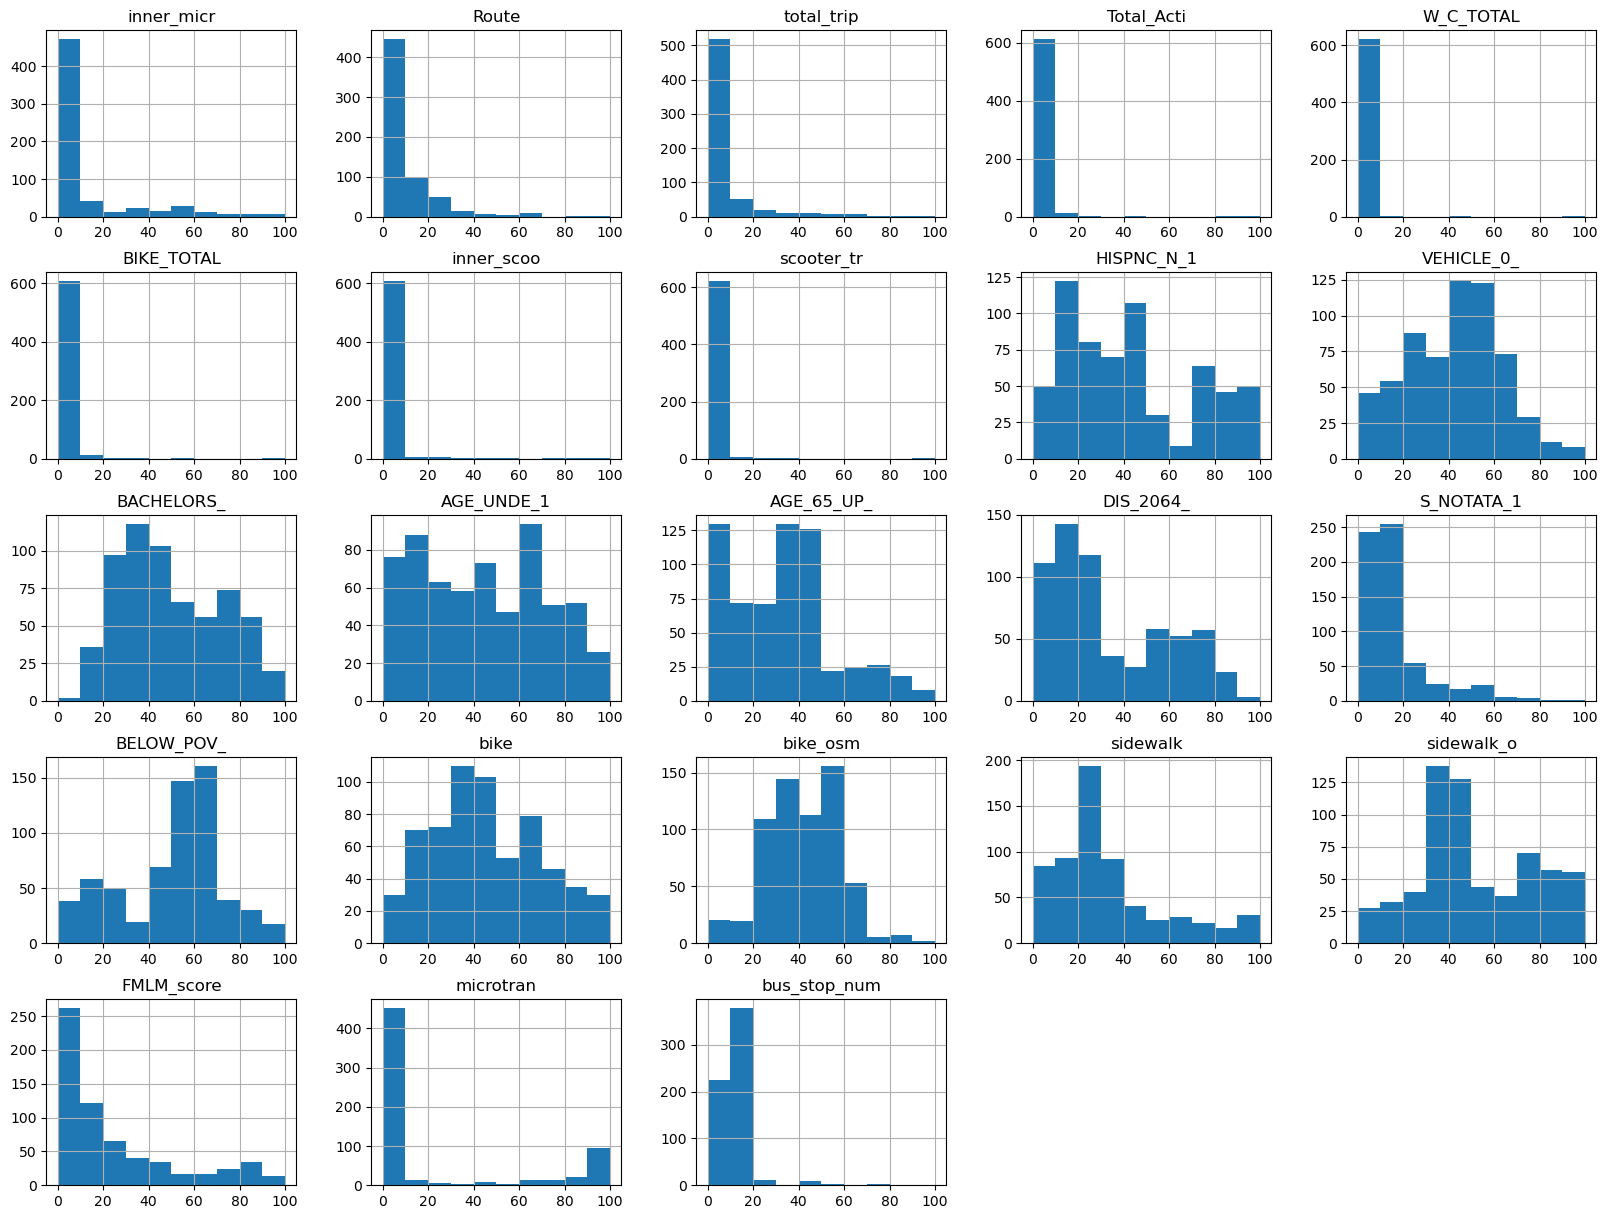

In [73]:
import matplotlib.pyplot as plt
fig, axis=plt.subplots( figsize=(20,15))
df_norm.hist(ax=axis)

In [74]:
df_norm.columns

Index(['inner_micr', 'Route', 'total_trip', 'Total_Acti', 'W_C_TOTAL',
       'BIKE_TOTAL', 'inner_scoo', 'scooter_tr', 'HISPNC_N_1', 'VEHICLE_0_',
       'BACHELORS_', 'AGE_UNDE_1', 'AGE_65_UP_', 'DIS_2064_', 'S_NOTATA_1',
       'BELOW_POV_', 'bike', 'bike_osm', 'sidewalk', 'sidewalk_o',
       'FMLM_score', 'microtran', 'bus_stop_num'],
      dtype='object')

In [75]:
df_norm['score']=0.3*(0.4*df_norm.Total_Acti+0.05*df_norm.W_C_TOTAL+0.05*df_norm.BIKE_TOTAL+0.1*df_norm.Route+0.1*df_norm.bus_stop_num+0.3*df_norm.total_trip)+0.3*(0.05*df_norm.inner_micr+0.05*df_norm.microtran+0.1*df_norm.inner_scoo+0.1*df_norm.scooter_tr+0.7*df_norm.FMLM_score)+0.2*(0.25*(df_norm.bike_osm+df_norm.bike+df_norm.sidewalk_o+df_norm.sidewalk))+0.2*(0.125*(df_norm.HISPNC_N_1+df_norm.VEHICLE_0_+df_norm.BACHELORS_+df_norm.AGE_UNDE_1+df_norm.AGE_65_UP_+df_norm.DIS_2064_+df_norm.S_NOTATA_1))

In [76]:
df_norm['score'].describe()

count    628.000000
mean      22.315085
std        7.559618
min        7.512454
25%       16.445848
50%       22.125027
75%       26.106135
max       58.076085
Name: score, dtype: float64

In [80]:
score_df=pd.concat([result2,df_norm['score']],axis=1)

In [82]:
score_df.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/results/score.shp') 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_1048\3275730544.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  score_df.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/results/score.shp')


<AxesSubplot: ylabel='Frequency'>

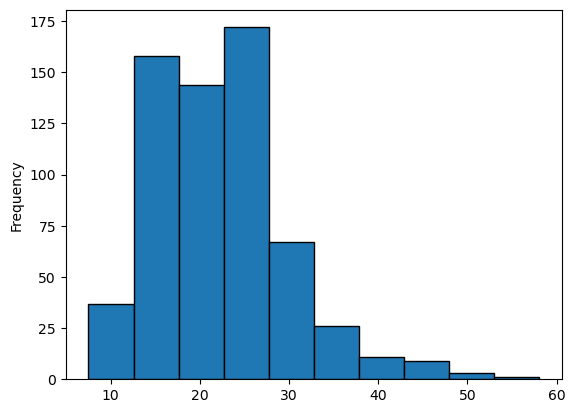

In [83]:
df_norm['score'].plot(kind='hist',edgecolor='black')